In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from collections import Counter
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=5, n_redundant=5,weights=[0.9], random_state=42)

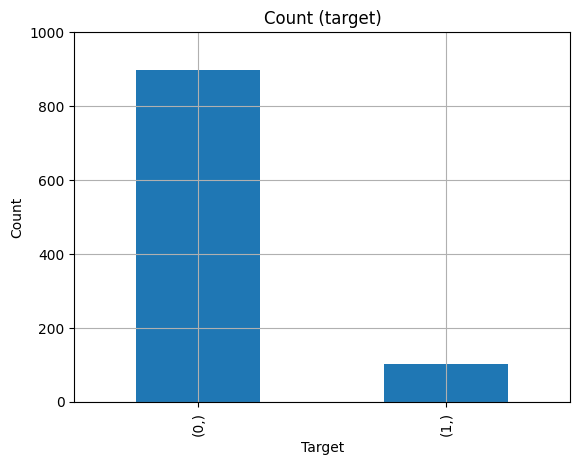

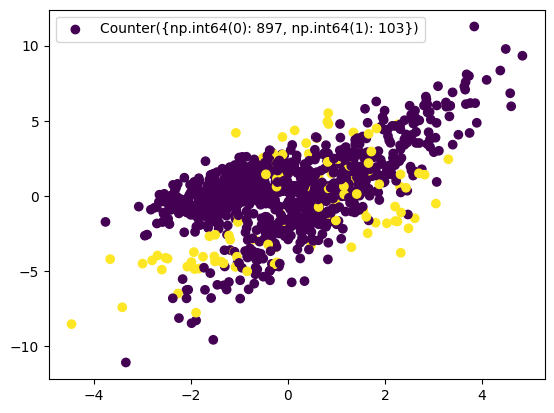

In [32]:
pd.DataFrame(y).value_counts().plot(kind='bar', title='Count (target)',grid=True)
plt.ylim(0,1000)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()
plt.scatter(pd.DataFrame(X)[0], pd.DataFrame(X)[1], c=y,label=Counter(y))
plt.legend()


In [22]:
X.shape, y.shape

((1000, 10), (1000,))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [35]:
class_weights = [{0:1,1:1}, {0:1,1:2}, {0:1,1:3}, {0:1,1:4}, {0:1,1:5}, {0:1,1:10}, {0:1,1:20}, {0:1,1:50}, {0:1,1:100}, {0:1,1:1000}]

In [36]:
class_weights

[{0: 1, 1: 1},
 {0: 1, 1: 2},
 {0: 1, 1: 3},
 {0: 1, 1: 4},
 {0: 1, 1: 5},
 {0: 1, 1: 10},
 {0: 1, 1: 20},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 1, 1: 1000}]

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
## Hyperparameter tuning
penalty = ['l1', 'l2','elasticnet']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']
param_grid = dict(penalty=penalty, C=C, solver=solver,class_weight=class_weights)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1, cv=cv)


In [39]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/workspace

In [42]:
print(grid.best_score_*100)

85.42410714285712


In [44]:
print(grid.best_params_)

{'C': 0.01, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'saga'}


In [45]:
y_pred = grid.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100}\n')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 79.33333333333333

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       265
           1       0.34      0.80      0.47        35

    accuracy                           0.79       300
   macro avg       0.65      0.80      0.67       300
weighted avg       0.89      0.79      0.83       300

[[210  55]
 [  7  28]]


### Logistic Regression with ROC curve and ROC AUC score


In [51]:
## roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [49]:
X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=5, n_redundant=5, random_state=42)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

([<matplotlib.patches.Wedge at 0x72652b17f1d0>,
 [Text(-1.0999999999999959, -9.616505800409723e-08, '0'),
  Text(1.0999999999999832, 1.9233011600819372e-07, '1')],
 [Text(-0.5999999999999978, -5.2453668002234845e-08, '50.0%'),
  Text(0.5999999999999908, 1.0490733600446929e-07, '50.0%')])

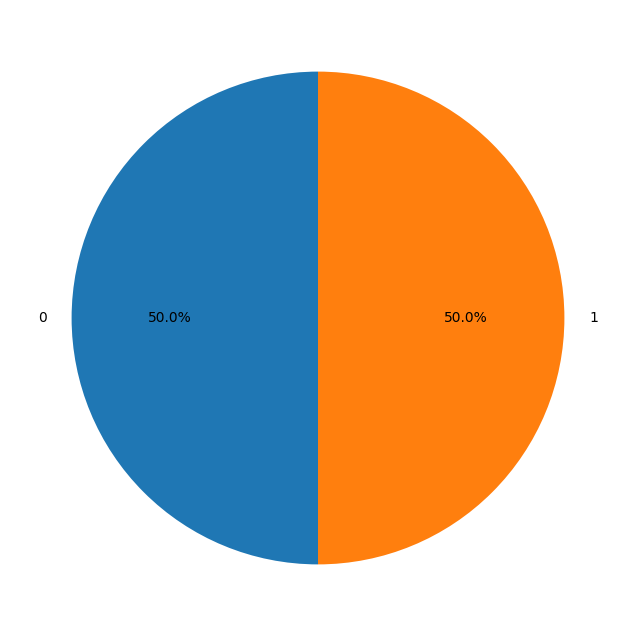

In [55]:
plt.figure(figsize=(12,8))
plt.pie(pd.DataFrame(y)[0].value_counts(), labels=['0','1'], autopct='%1.1f%%', startangle=90)

In [57]:
dumy_model_prob = [0 for _ in range(len(y_test))]
print(dumy_model_prob)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [58]:
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
model_prob=lr.predict_proba(X_test)

In [60]:
model_prob = model_prob[:,1]

In [63]:
auc_dummy = roc_auc_score(y_test, dumy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(f"Dummy model AUC: {auc_dummy*100:.3f}")
print(f"Logistic model AUC: {model_auc*100:.3f}")

Dummy model AUC: 50.000
Logistic model AUC: 88.479


In [66]:
dumy_fpr, dumy_tpr, _ = roc_curve(y_test, dumy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob) 

In [68]:
thresholds

array([           inf, 9.92084243e-01, 9.79422296e-01, 9.79280996e-01,
       9.32944513e-01, 9.20718565e-01, 9.10884579e-01, 9.10073855e-01,
       9.08357335e-01, 9.00426287e-01, 8.93019817e-01, 8.90859586e-01,
       8.84492455e-01, 8.78754120e-01, 8.49879051e-01, 8.47535767e-01,
       8.34057333e-01, 8.33181188e-01, 8.13681618e-01, 8.13653158e-01,
       8.02394145e-01, 7.95589374e-01, 7.70553569e-01, 7.65195892e-01,
       7.07708519e-01, 7.06487629e-01, 6.93544338e-01, 6.83949607e-01,
       6.83683316e-01, 6.82663804e-01, 6.80788261e-01, 6.78078527e-01,
       6.67664788e-01, 6.62899486e-01, 6.60357620e-01, 6.48369443e-01,
       5.93431274e-01, 5.92482951e-01, 5.83688645e-01, 5.80487315e-01,
       5.79507615e-01, 5.76418551e-01, 5.43853844e-01, 5.42922102e-01,
       5.27342112e-01, 5.06600852e-01, 4.88095941e-01, 4.83790198e-01,
       4.81445266e-01, 4.78910593e-01, 4.67825054e-01, 4.61396431e-01,
       4.54612630e-01, 4.48250841e-01, 4.36153277e-01, 4.36052254e-01,
      

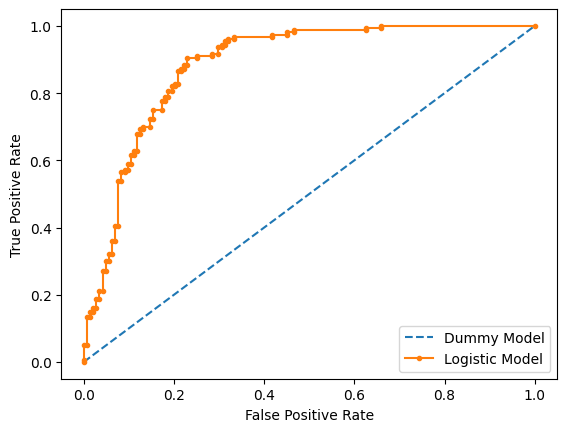

In [ ]:
plt.plot(dumy_fpr, dumy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

/tmp/ipykernel_4840/3751710075.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


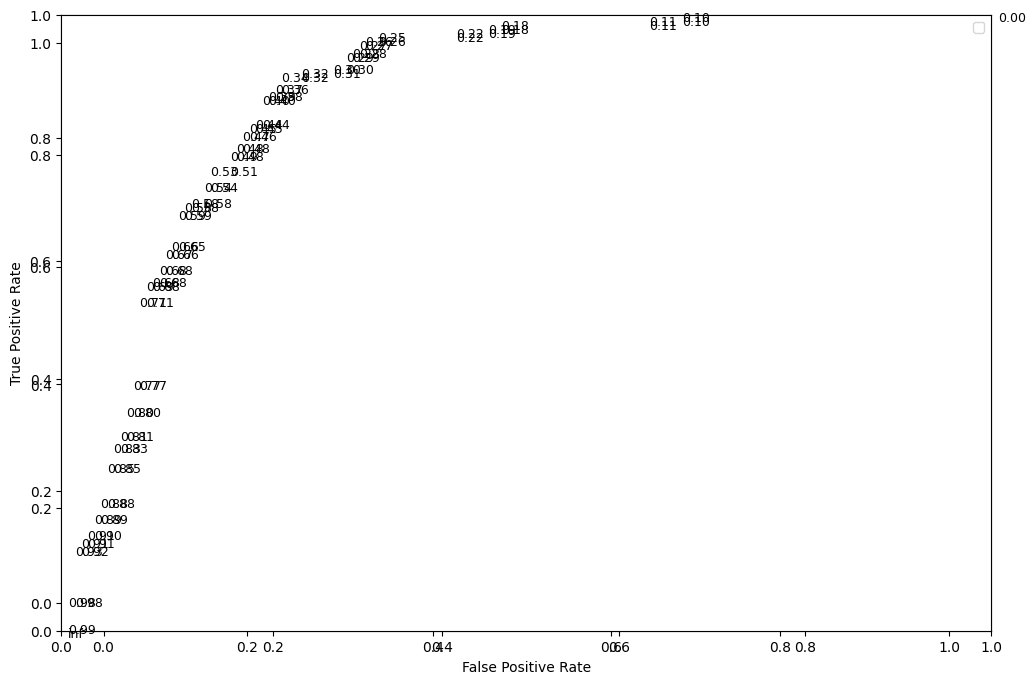

In [85]:
# plot thresholds
fig = plt.figure(figsize=(12,8))
plt.plot(dumy_fpr, dumy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Model')
ax = fig.add_subplot(111)
for i, (fpr, tpr) in enumerate(zip(model_fpr, model_tpr,)):
    ax.annotate(f'{thresholds[i]:.2f}', xy=(fpr, tpr), textcoords='offset points', xytext=(5, -5), fontsize=9)

# for xy in zip(dumy_fpr, dumy_tpr):
    # ax.annotate('%s' % np.round(xy[2],1), xy=(xy[0],xy[1]), textcoords='data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
  